#### 1. Read in wholesale_customers_data.csv from the datasets folder and store in a dataframe

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("Wholesale Customers Data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### 2. Store the Channel column in a separate variable¶

In [43]:
channel = df['Channel']

#### 3. Drop the Channel and Region columns from the dataframe.

In [27]:
df = df.drop(['Channel', 'Region'], axis=1)


### 4. Scale the data

In [28]:
from sklearn.preprocessing import StandardScaler

In [44]:
std_scalar = StandardScaler()
s_data = std_scalar.fit_transform(df) 


#### 5. use PCA to engineer new features (Principal Components).¶


In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x = pca.fit_transform(s_data)


In [46]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())


[3.10707136 1.79404441]
[0.38750123 0.22374588]
[0.38750123 0.61124711]


#### K-Means, but Without All the Supervision¶


In [35]:
from sklearn.cluster import KMeans

In [36]:
kmeans = KMeans(n_clusters=2, random_state=0)
k_fit = kmeans.fit(s_data)
y_kmeans = kmeans.predict(s_data)


#### Use PCA to transform the data, and then use k-means clustering on it to see if our results are any better.

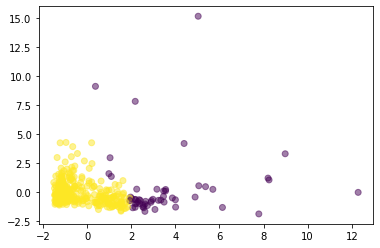

In [49]:
plt.scatter(x[:,0],x[:, 1], c=kmeans.labels_, alpha=0.5, edgecolors='face')